<a href="https://colab.research.google.com/github/Shrushti-2002/CodeAlpha/blob/main/Task_3_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sales Data Visualization**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
%matplotlib inline

In [29]:
# Step 1: Generate Sample Dataset
# ------------------------
data = {
'Date': pd.date_range(start='2025-01-01', periods=100),
'Region': np.random.choice(['North', 'South', 'East', 'West'], 100),
'Product': np.random.choice(['Laptop', 'Tablet', 'Smartphone'], 100),
'Units_Sold': np.random.randint(1, 20, 100),
'Revenue': np.random.randint(100, 2000, 100)
}

In [30]:
# Create DataFrame
df = pd.DataFrame(data)

In [31]:
df.head()

,Date,Region,Product,Units_Sold,Revenue
0,2025-01-01,West,Tablet,18,208
1,2025-01-02,East,Smartphone,12,962
2,2025-01-03,North,Smartphone,3,1582
3,2025-01-04,North,Tablet,1,128
4,2025-01-05,West,Smartphone,3,1884


In [32]:
# Step 2: Prepare Aggregated Data
# ------------------------
sales_trend = df.groupby('Date')['Revenue'].sum().reset_index()
region_sales = df.groupby('Region')['Revenue'].sum().reset_index()
product_sales = df.groupby('Product')['Units_Sold'].sum().reset_index()

/tmp/ipython-input-3941304617.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Revenue', palette='pastel', ax=axes[0,1])
/tmp/ipython-input-3941304617.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Product', y='Units_Sold', palette='muted', ax=axes[1,0])


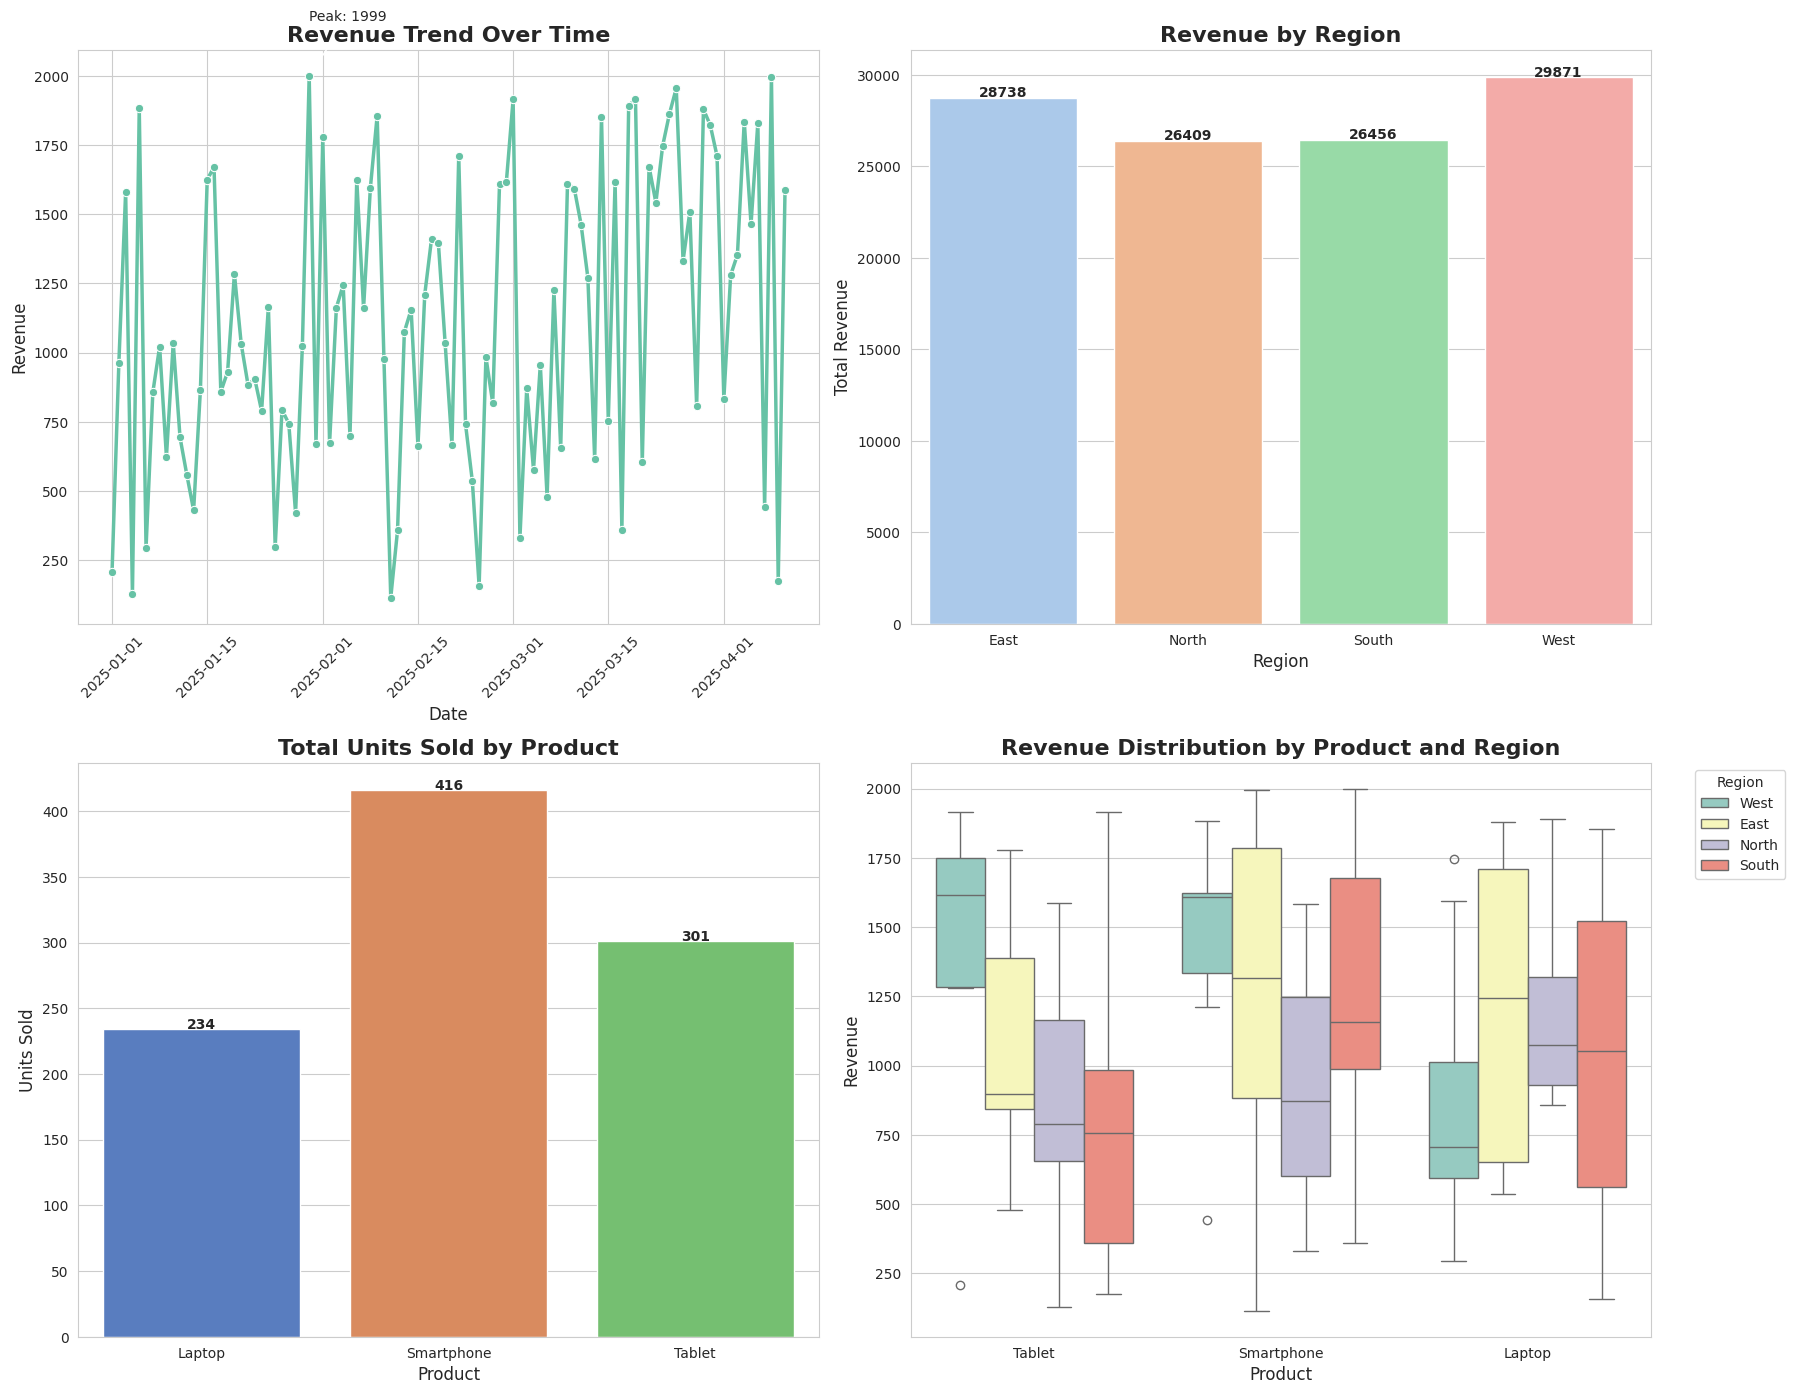

In [45]:
# Step 3: Dashboard Layout with Styling Enhancements
# ------------------------
sns.set_style("whitegrid")
sns.set_palette("Set2")
fig, axes = plt.subplots(2, 2, figsize=(18,14))

# Revenue Trend Over Time
sns.lineplot(data=sales_trend, x='Date', y='Revenue', marker='o', linewidth=2.5, ax=axes[0,0])
axes[0,0].set_title('Revenue Trend Over Time', fontsize=16, fontweight='bold')
axes[0,0].set_xlabel('Date', fontsize=12)
axes[0,0].set_ylabel('Revenue', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45)

# Annotate peak revenue
peak_date = sales_trend.loc[sales_trend['Revenue'].idxmax()]
axes[0,0].annotate(f"Peak: {peak_date['Revenue']}",
                   xy=(peak_date['Date'], peak_date['Revenue']),
                   xytext=(peak_date['Date'], peak_date['Revenue']+200),
                   arrowprops=dict(facecolor='black', arrowstyle='->'))

# Revenue by Region
sns.barplot(data=region_sales, x='Region', y='Revenue', palette='pastel', ax=axes[0,1])
axes[0,1].set_title('Revenue by Region', fontsize=16, fontweight='bold')
axes[0,1].set_xlabel('Region', fontsize=12)
axes[0,1].set_ylabel('Total Revenue', fontsize=12)
for index, row in region_sales.iterrows():
    axes[0,1].text(index, row.Revenue + 50, round(row.Revenue, 0), ha='center', fontweight='bold')

# Total Units Sold by Product
sns.barplot(data=product_sales, x='Product', y='Units_Sold', palette='muted', ax=axes[1,0])
axes[1,0].set_title('Total Units Sold by Product', fontsize=16, fontweight='bold')
axes[1,0].set_xlabel('Product', fontsize=12)
axes[1,0].set_ylabel('Units Sold', fontsize=12)
for index, row in product_sales.iterrows():
    axes[1,0].text(index, row.Units_Sold + 0.5, row.Units_Sold, ha='center', fontweight='bold')

# Revenue Distribution by Product and Region
sns.boxplot(data=df, x='Product', y='Revenue', hue='Region', palette='Set3', ax=axes[1,1])
axes[1,1].set_title('Revenue Distribution by Product and Region', fontsize=16, fontweight='bold')
axes[1,1].set_xlabel('Product', fontsize=12)
axes[1,1].set_ylabel('Revenue', fontsize=12)
axes[1,1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('sales_dashboard_highres.png', dpi=300, bbox_inches='tight')
plt.savefig('sales_dashboard_highres.pdf', dpi=300, bbox_inches='tight')
plt.show()